# Cleaning the infamous Titanic Data Set

In [2]:
# imports
import pandas as pd
import missingno as msno

In [4]:
# load data as dataframe
df = pd.read_csv("/Users/marcolaureano2/Documents/GitHub/Titanic/Data/titanic_dirty.csv")
df

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.28,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.93,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.10,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,622,623,1,3,"Nakid, Mr. Sahid",male,20.0,1,1,2653,$15.74,NaN,C
902,77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,$8.05,NaN,S
903,715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,$7.65,F G73,S
904,623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,$7.85,NaN,S


## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   906 non-null    int64  
 1   PassengerId  906 non-null    int64  
 2   Survived     906 non-null    int64  
 3   Pclass       906 non-null    int64  
 4   Name         906 non-null    object 
 5   Sex          906 non-null    object 
 6   Age          723 non-null    float64
 7   SibSp        906 non-null    object 
 8   Parch        906 non-null    int64  
 9   Ticket       906 non-null    object 
 10  Fare         906 non-null    object 
 11  Cabin        207 non-null    object 
 12  Embarked     904 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 92.1+ KB


In [6]:
# View object columns only
df.select_dtypes(include='object')

,Name,Sex,SibSp,Ticket,Fare,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,1,A/5 21171,$7.25,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,PC 17599,$71.28,C85,C
2,"Heikkinen, Miss. Laina",female,0,STON/O2. 3101282,$7.93,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,113803,$53.10,C123,S
4,"Allen, Mr. William Henry",male,0,373450,$8.05,NaN,S
...,...,...,...,...,...,...,...
901,"Nakid, Mr. Sahid",male,1,2653,$15.74,NaN,C
902,"Moutal, Mr. Rahamin Haim",male,0,374746,$8.05,NaN,S
903,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,0,348124,$7.65,F G73,S
904,"Hansen, Mr. Henry Damsgaard",male,0,350029,$7.85,NaN,S


### Convert 'Fare' dtype

In [9]:
# remove $
df['Fare'] = df['Fare'].str.replace('$', '')

/var/folders/jx/cpydz30j3y523cvb2w4sjv7h0000gn/T/ipykernel_2384/1879531272.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Fare'] = df['Fare'].str.replace('$', '')


In [10]:
# confirm $ has been removed
df['Fare']

0       7.25
1      71.28
2       7.93
3      53.10
4       8.05
       ...  
901    15.74
902     8.05
903     7.65
904     7.85
905    23.45
Name: Fare, Length: 906, dtype: object

In [11]:
# change dtype to float
df['Fare'] = df['Fare'].astype(float)

# confirm change
df['Fare'].dtype

dtype('float64')

### Convert SibSp

In [12]:
# inspect value counts
df['SibSp'].value_counts()

0      618
1      212
2       27
4       18
3       16
8        7
5        5
one      3
Name: SibSp, dtype: int64

In [13]:
# standardize one/1
df['SibSp'] = df['SibSp'].str.replace('one', '1')

# confirm change
df['SibSp'].value_counts()

0    618
1    215
2     27
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [14]:
# convert dtype to float
df['SibSp'] = df['SibSp'].astype(int)

# confirm change
df['SibSp'].dtype

dtype('int64')

In [15]:
# View object columns only to confirm changes
df.select_dtypes(include='object')

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
901,"Nakid, Mr. Sahid",male,2653,NaN,C
902,"Moutal, Mr. Rahamin Haim",male,374746,NaN,S
903,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,348124,F G73,S
904,"Hansen, Mr. Henry Damsgaard",male,350029,NaN,S


### Drop unwanted columns

In [16]:
df

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,622,623,1,3,"Nakid, Mr. Sahid",male,20.0,1,1,2653,15.74,NaN,C
902,77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.05,NaN,S
903,715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.65,F G73,S
904,623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.85,NaN,S


In [18]:
# Drop the Unnamed: 0 column
df.drop(columns='Unnamed: 0', inplace = True)
df.set_index('PassengerId')

# Display the .head to confirm the change
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


### Rename Columns

In [19]:
# rename dictionary
rename_dict = {'SibSp': 'Siblings or Spouses', 'Parch': 'Parents or Children'}

In [20]:
# rename
df.rename(columns=rename_dict, inplace = True)

# confirm changes
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Siblings or Spouses,Parents or Children,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


### Duplicates

In [23]:
# identify duplicates
duplicated_rows = df.duplicated()
duplicated_rows.sum()

15

In [26]:
# get all duplicates
duplicated_rows_all = df.duplicated(keep=False)

duplicated_rows_all.sum()

30

In [27]:
# visualize duplicates, sort by PassengerId
df[duplicated_rows_all].sort_values('PassengerId')

,PassengerId,Survived,Pclass,Name,Sex,Age,Siblings or Spouses,Parents or Children,Ticket,Fare,Cabin,Embarked
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.05,NaN,S
902,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.05,NaN,S
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.50,E40,C
899,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.50,E40,C
362,363,0,3,"Barbara, Mrs. (Catherine David)",female,45.0,0,1,2691,14.45,NaN,C
896,363,0,3,"Barbara, Mrs. (Catherine David)",female,45.0,0,1,2691,14.45,NaN,C
447,448,1,1,"Seward, Mr. Frederic Kimber",male,34.0,0,0,113794,26.55,NaN,S
892,448,1,1,"Seward, Mr. Frederic Kimber",male,34.0,0,0,113794,26.55,NaN,S
464,465,0,3,"Maisner, Mr. Simon",male,NaN,0,0,A/S 2816,8.05,NaN,S
898,465,0,3,"Maisner, Mr. Simon",male,NaN,0,0,A/S 2816,8.05,NaN,S


In [29]:
 # drop duplicates
df = df.drop_duplicates()

# confirm duplicates have been removed
df.duplicated().sum()

0

### Unique Identifiers 

In [31]:
# get unique values
df.nunique()

PassengerId            891
Survived                 2
Pclass                   3
Name                   891
Sex                      3
Age                     88
Siblings or Spouses      7
Parents or Children      7
Ticket                 681
Fare                   234
Cabin                  147
Embarked                 4
dtype: int64

In [32]:
# get percent of unique values per column
df.nunique() / len(df) * 100

PassengerId            100.000000
Survived                 0.224467
Pclass                   0.336700
Name                   100.000000
Sex                      0.336700
Age                      9.876543
Siblings or Spouses      0.785634
Parents or Children      0.785634
Ticket                  76.430976
Fare                    26.262626
Cabin                   16.498316
Embarked                 0.448934
dtype: float64

### Inspect unique columns

In [33]:
# slice out unique columns
df.loc[:, ['PassengerId', 'Name']]

,PassengerId,Name
0,1,"Braund, Mr. Owen Harris"
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,"Heikkinen, Miss. Laina"
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,"Allen, Mr. William Henry"
...,...,...
886,887,"Montvila, Rev. Juozas"
887,888,"Graham, Miss. Margaret Edith"
888,889,"Johnston, Miss. Catherine Helen ""Carrie"""
889,890,"Behr, Mr. Karl Howell"


### Set PassengerId as index

In [34]:
# set index
df = df.set_index('PassengerId')

# confirm
df

,Survived,Pclass,Name,Sex,Age,Siblings or Spouses,Parents or Children,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S


### Drop string column Name

In [ ]:
df = df.drop('Name', axis = 1)

In [40]:
# confirm
df

,Survived,Pclass,Sex,Age,Siblings or Spouses,Parents or Children,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,female,38.0,1,0,PC 17599,71.28,C85,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.93,NaN,S
4,1,1,female,35.0,1,0,113803,53.10,C123,S
5,0,3,male,35.0,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,211536,13.00,NaN,S
888,1,1,female,19.0,0,0,112053,30.00,B42,S
889,0,3,female,NaN,1,2,W./C. 6607,23.45,NaN,S


## Missing values

In [41]:
# get null counts
null_sums = df.isna().sum()
null_sums

Survived                 0
Pclass                   0
Sex                      0
Age                    177
Siblings or Spouses      0
Parents or Children      0
Ticket                   0
Fare                     0
Cabin                  687
Embarked                 2
dtype: int64

In [42]:
# calculate null percent
null_percent = null_sums/len(df) * 100
null_percent

Survived                0.000000
Pclass                  0.000000
Sex                     0.000000
Age                    19.865320
Siblings or Spouses     0.000000
Parents or Children     0.000000
Ticket                  0.000000
Fare                    0.000000
Cabin                  77.104377
Embarked                0.224467
dtype: float64

In [43]:
# visualize missing values 
null_percent[null_percent>0]

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

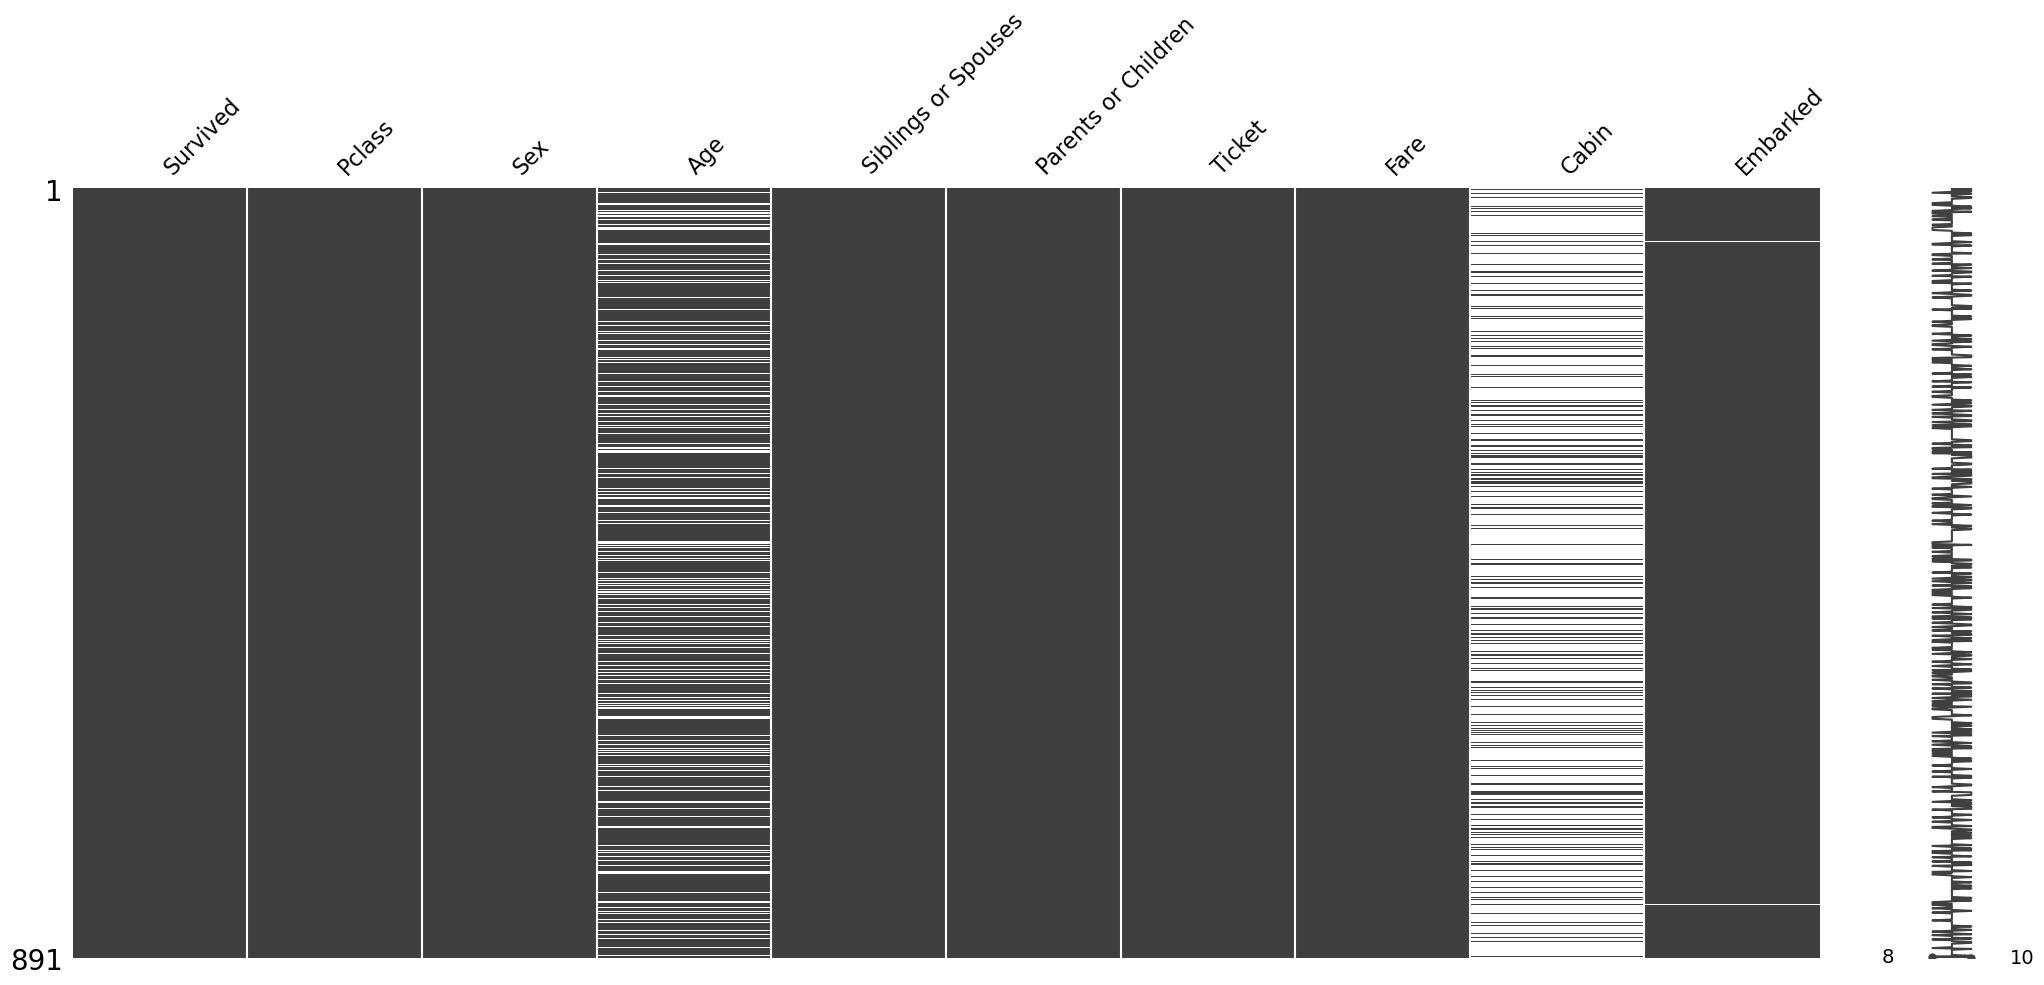

In [45]:
# missingno visualization
msno.matrix(df);

### Address nulls

In [46]:
# cabin nulls
null_cabin = df['Cabin'].isna()
null_cabin

PassengerId
1       True
2      False
3       True
4      False
5       True
       ...  
887     True
888    False
889     True
890    False
891     True
Name: Cabin, Length: 891, dtype: bool

In [47]:
# fill null categorical values with MISSING
cat_cols = df.select_dtypes('object').columns

df[cat_cols] = df[cat_cols].fillna('MISSING')

In [53]:
# numerical columns
num_cols = df.select_dtypes(include=['int64'])
num_cols

,Survived,Pclass,Siblings or Spouses,Parents or Children
PassengerId,,,,
1,0,3,1,0
2,1,1,1,0
3,1,3,0,0
4,1,1,1,0
5,0,3,0,0
...,...,...,...,...
887,0,2,0,0
888,1,1,0,0
889,0,3,1,2


In [54]:
df = df.fillna('-1')

In [55]:
df[df.notnull().all(1)]

,Survived,Pclass,Sex,Age,Siblings or Spouses,Parents or Children,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.25,MISSING,S
2,1,1,female,38.0,1,0,PC 17599,71.28,C85,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.93,MISSING,S
4,1,1,female,35.0,1,0,113803,53.10,C123,S
5,0,3,male,35.0,0,0,373450,8.05,MISSING,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,211536,13.00,MISSING,S
888,1,1,female,19.0,0,0,112053,30.00,B42,S
889,0,3,female,-1,1,2,W./C. 6607,23.45,MISSING,S


In [ ]:
# confirm no more nulls
msno.